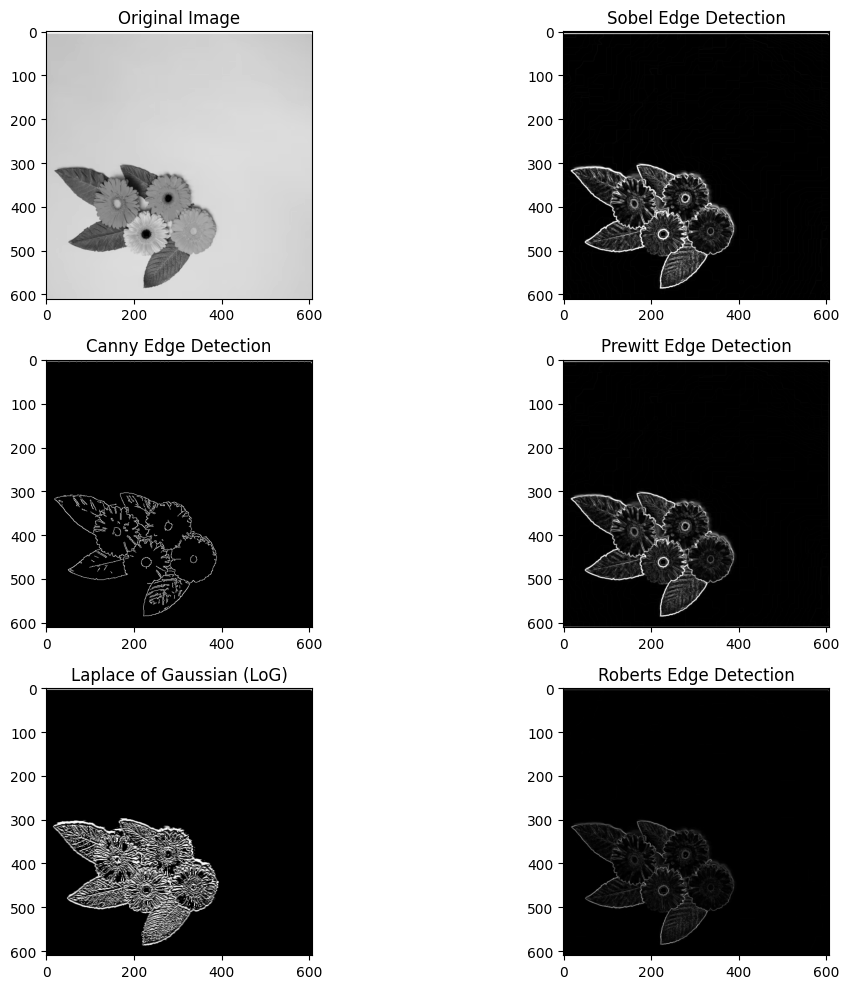

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_laplace
from scipy.signal import convolve2d

# Load the image
image = cv2.imread('C:/Users/ramco/OneDrive/Desktop/Mtech Docs/Second Sem/Image and Video/PG_lab/Photo3.png', cv2.IMREAD_GRAYSCALE)

# Sobel Edge Detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_mag = cv2.convertScaleAbs(sobel_mag)

# Canny Edge Detection
canny_edges = cv2.Canny(image, 100, 200)

# Prewitt Edge Detection
prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x_filtered = convolve2d(image, prewitt_x, mode='same', boundary='wrap')
prewitt_y_filtered = convolve2d(image, prewitt_y, mode='same', boundary='wrap')
prewitt_mag = np.sqrt(prewitt_x_filtered**2 + prewitt_y_filtered**2)
prewitt_mag = np.clip(prewitt_mag, 0, 255).astype(np.uint8)

# Laplace of Gaussian (LoG) Edge Detection
log = gaussian_laplace(image, sigma=1.0)
log = np.abs(log)  # Make sure the image is positive

# Roberts Edge Detection
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])
roberts_x_filtered = convolve2d(image, roberts_x, mode='same', boundary='wrap')
roberts_y_filtered = convolve2d(image, roberts_y, mode='same', boundary='wrap')
roberts_mag = np.sqrt(roberts_x_filtered**2 + roberts_y_filtered**2)
roberts_mag = np.clip(roberts_mag, 0, 255).astype(np.uint8)

# Plot results
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(3, 2, 2)
plt.imshow(sobel_mag, cmap='gray')
plt.title('Sobel Edge Detection')

plt.subplot(3, 2, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.subplot(3, 2, 4)
plt.imshow(prewitt_mag, cmap='gray')
plt.title('Prewitt Edge Detection')

plt.subplot(3, 2, 5)
plt.imshow(log, cmap='gray')
plt.title('Laplace of Gaussian (LoG)')

plt.subplot(3, 2, 6)
plt.imshow(roberts_mag, cmap='gray')
plt.title('Roberts Edge Detection')

plt.tight_layout()
plt.show()
